In [1]:
import networkx as nx
from pathlib import Path
from matplotlib import colormaps
import sys
sys.path.append(str(Path.cwd().parent))
from backpropex import Node, Edge, Layer, Network, softmax

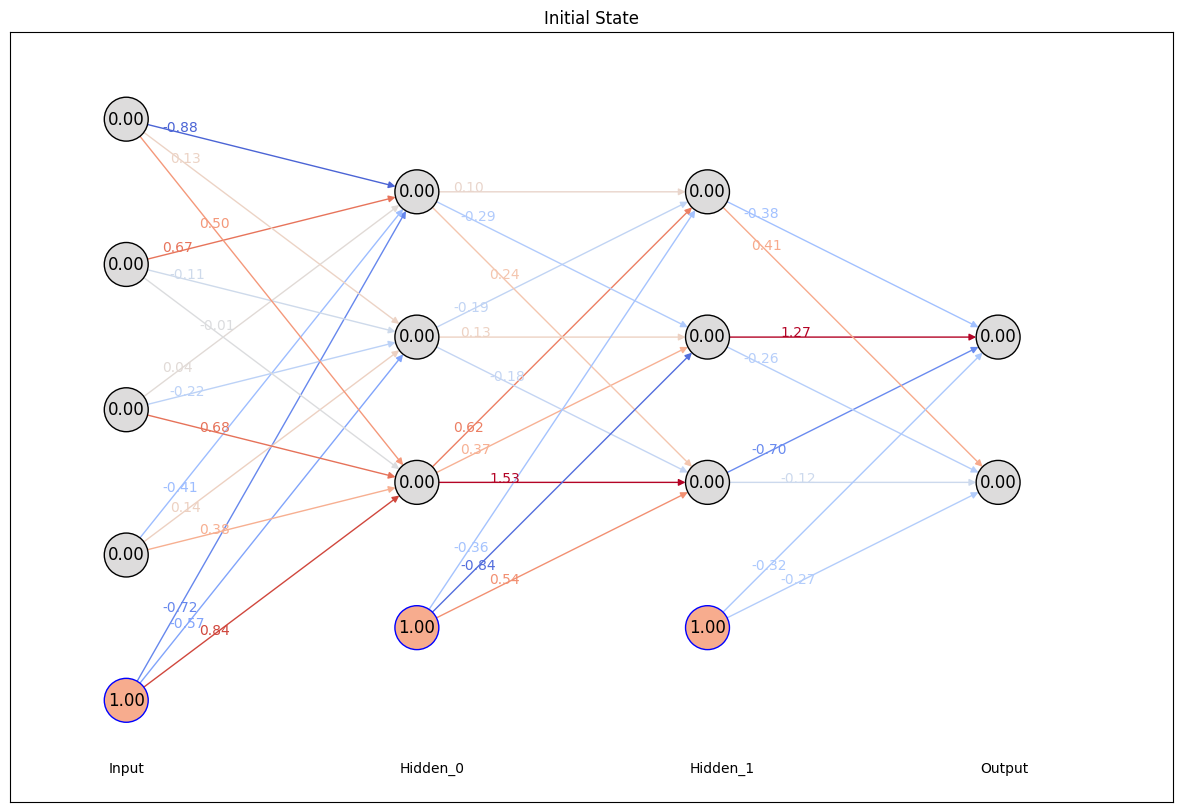

In [2]:
nn = Network(4, 3, 3, 2)
nn.draw()

In [3]:
GEN = nn.evaluate([1, 0, 1, 0])

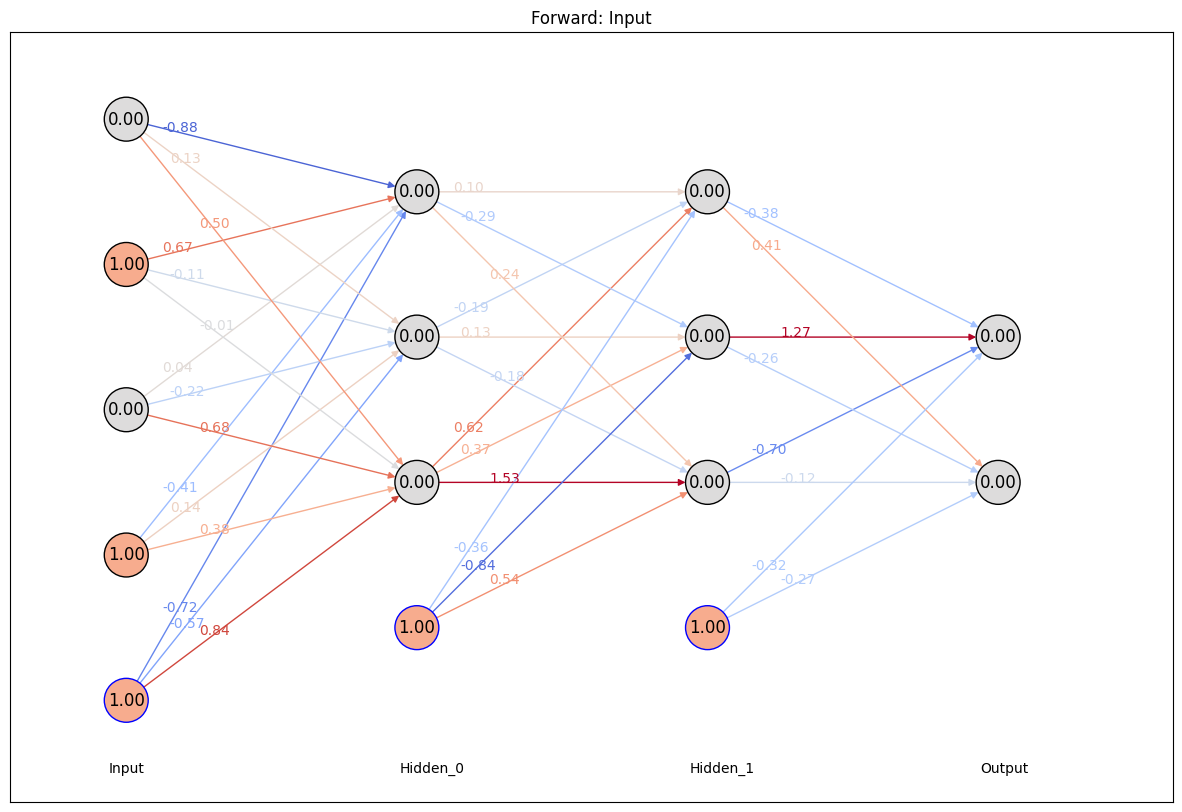

'Input'

In [4]:
next(GEN)

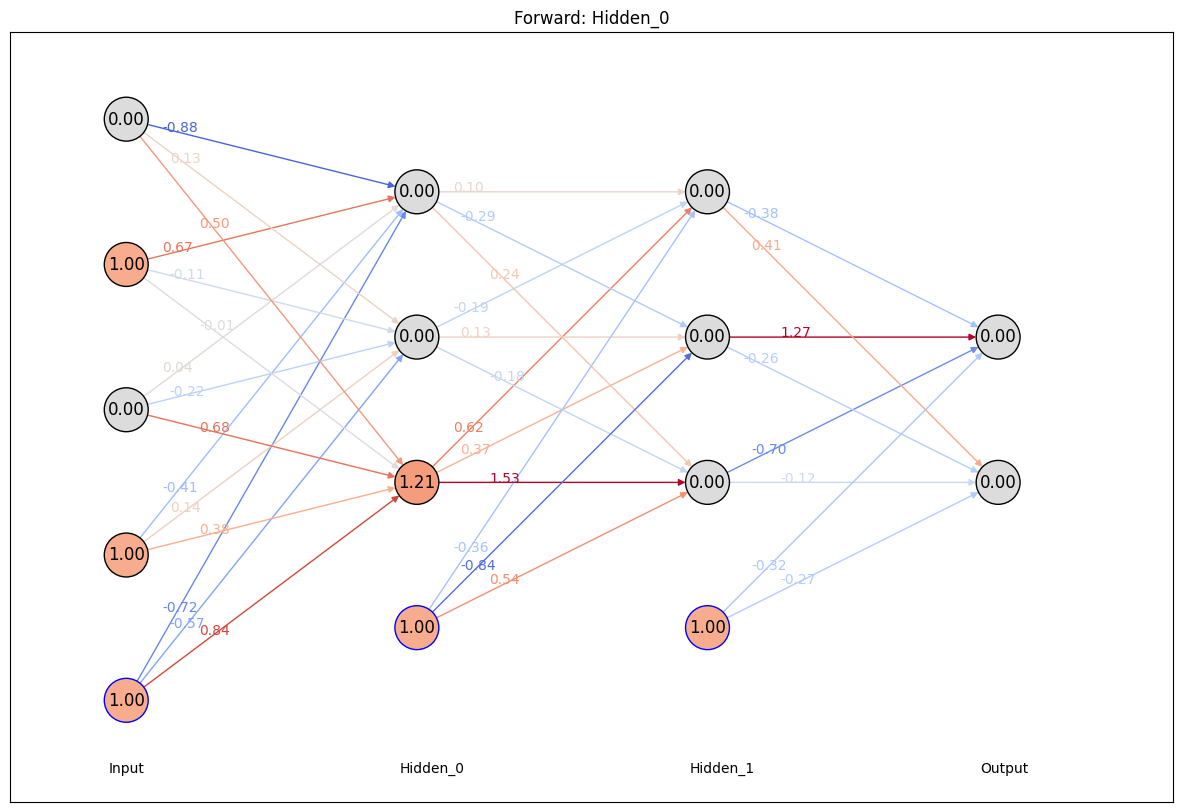

'Hidden_0'

In [5]:
next(GEN)

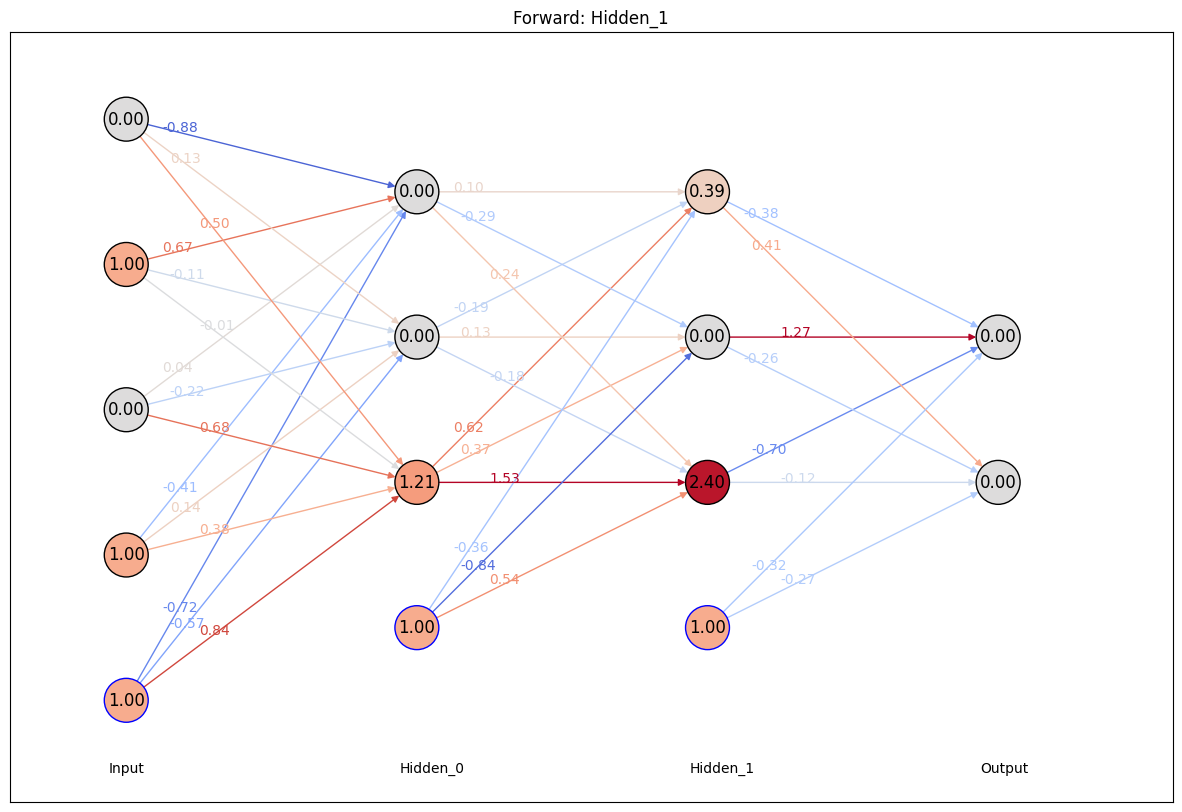

'Hidden_1'

In [6]:
next(GEN)

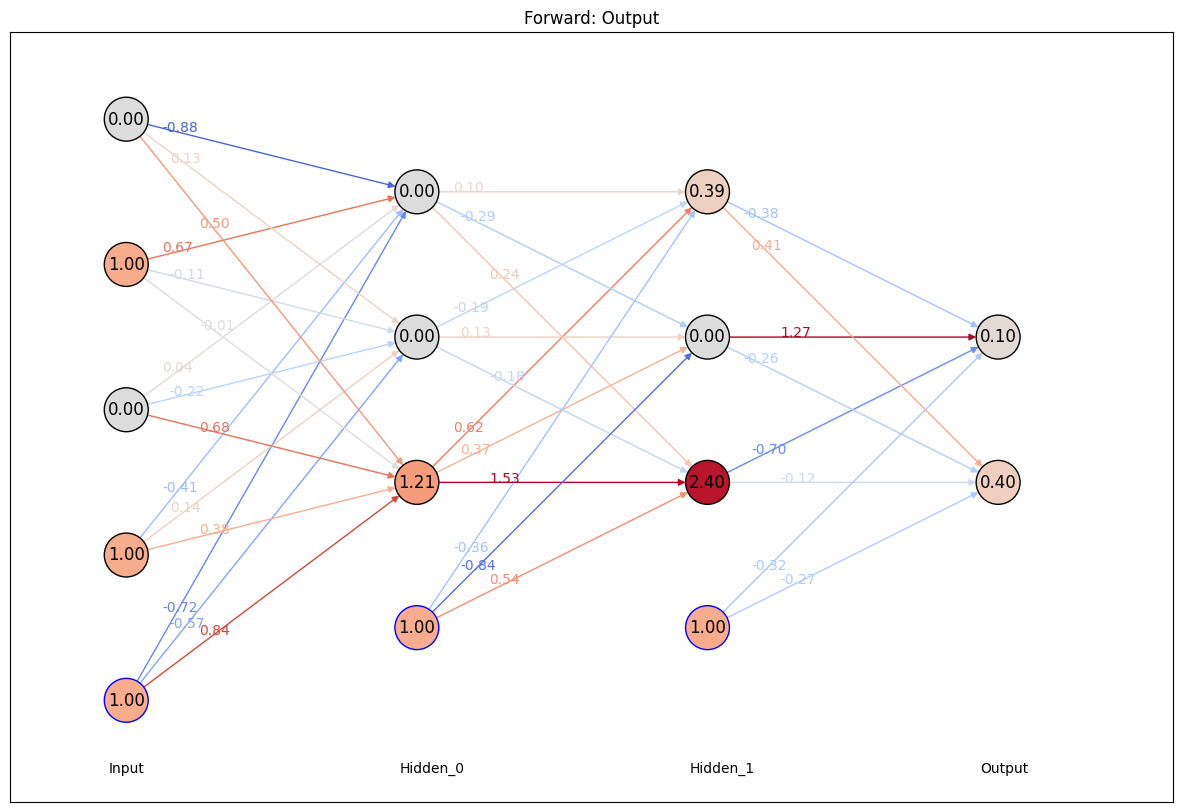

'Output'

In [7]:
next(GEN)

In [8]:
nn.output_layer.values

[0.39930594255477314, 0.10432576240173921]